In [66]:
import pandas as pd

df = pd.read_csv('scopus.csv')

# Which journals are publishing ASTM G32 stuff?

In [67]:
 df['Abbreviated Source Title'].unique()

array(['Tribol Int', 'Mater.', 'Wear', 'J Mater Eng Perform', 'Metals',
       'Rev Chim', 'Met. Mater. Int.', 'Adv. Sci. Technol. Res. J.',
       'Acta Phys Pol A', 'J. Phys. Conf. Ser.', 'Crystals',
       'IOP Conf. Ser. Mater. Sci. Eng.', 'Coatings', 'Phys. Procedia',
       'Proc. Struc. Inte.', 'Metall. Ital.',
       'METAL - Int. Conf. Metall. Mater., Conf. Proc.', 'Mater. Corros.',
       'Mater. Perform. Charact.', 'IOP Conf. Ser. Earth Environ. Sci.',
       'Int J Adv Manuf Technol', 'Surf. Rev. Lett.',
       'J. Braz. Soc. Mech. Sci. Eng.',
       'METAL - Anniv. Int. Conf. Met. Mater., Conf. Proc.',
       'METAL - Anniv. Int. Conf. Metall. Mater., Conf. Proc.',
       'Solid State Phenomena', 'Process.',
       'Structural Integr. Vek Konstr.', 'UPB Sci Bull Ser B',
       'Mater. Today Proc.', 'Mater. Res.', 'Acta Polytech.  CTU Proc.',
       'Frat. Integrita Strutr.', 'Key Eng Mat', 'Mater. Des.',
       'Sci. Sinter.',
       'Int. Conf. ThermoMechanical Process., 

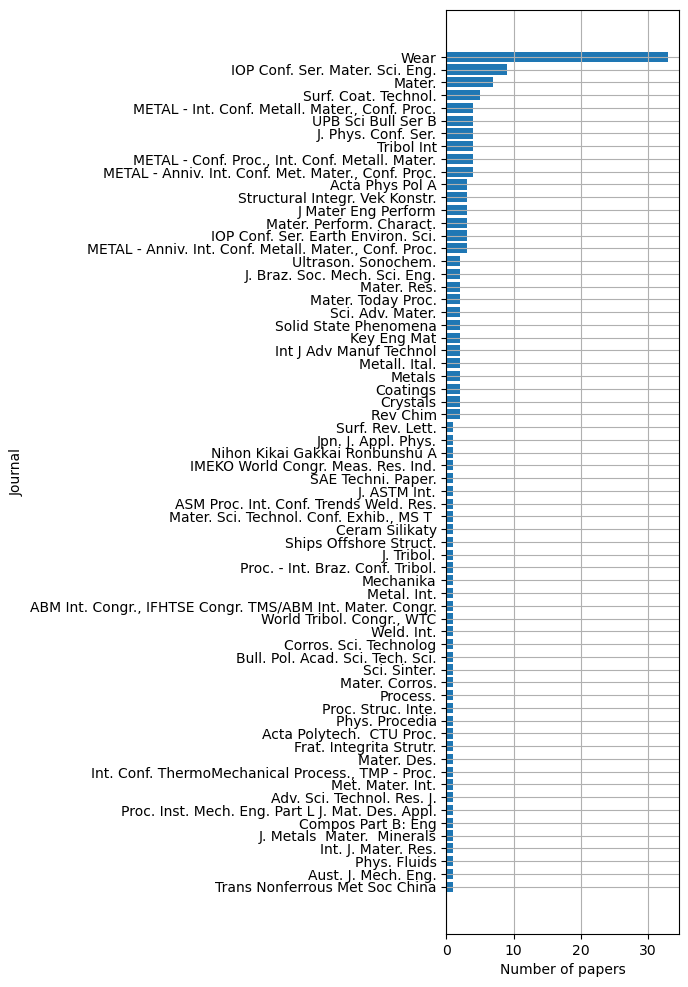

In [111]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(3,12) )

#hist = df['Abbreviated Source Title'].hist(ax = ax)
#hist


# Get frequency of each string in the column
histogram_data = df['Abbreviated Source Title'].value_counts() #.sort_values(ascending=False)

journals = histogram_data.index.to_numpy()
papers = histogram_data.to_numpy()

ax.barh(np.arange(len(journals)), papers, align='center')
ax.set_yticks(np.arange(len(journals)), labels=journals)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of papers')
ax.set_ylabel('Journal')
ax.grid()
#plt.show()


# Show me the papers published in Wear

In [115]:
df[ (df['Authors'].apply(
    lambda x: str(unicodedata.normalize('NFD', x).encode('ascii', 'ignore'),'UTF-8')
        )).str.contains("Micu") ].index + 2

Int64Index([15, 65, 72, 75, 81, 83, 93, 106, 120, 124, 144], dtype='int64')

# Which authors are publishing?


In [98]:
import itertools

import matplotlib.pyplot as plt
import numpy as np

import unicodedata

authors_list = df['Authors'].to_numpy()
#authors_list

flat_authors_list =list(
    itertools.chain.from_iterable(
            [authors.split("; ") for authors in authors_list]
    )
)


flat_authors_list = [unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
                     for text in flat_authors_list]

#print(unicodedata.normalize('NFD', text).encode('ascii', 'ignore'))



histogram_data = pd.Series(flat_authors_list).value_counts(sort=True)

histogram_data = histogram_data[histogram_data > 5]



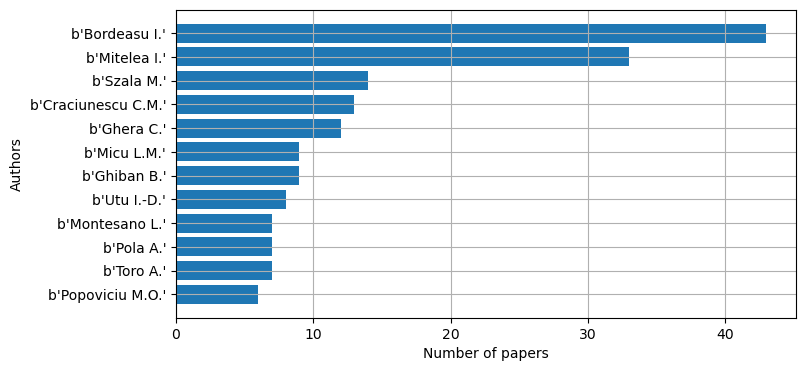

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(8,4) )

authors = histogram_data.index.to_numpy()
papers = histogram_data.to_numpy()

ax.barh(np.arange(len(authors)), papers, align='center')
ax.set_yticks(np.arange(len(authors)), labels=authors)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of papers')
ax.set_ylabel('Authors')
ax.grid()
#plt.show()

In [103]:
"IMPROVEMENT THE CAVITATION EROSION RESISTANCE OF Al-Mg ALLOYS BY TIG SURFACE REMELTING".lower()

'improvement the cavitation erosion resistance of al-mg alloys by tig surface remelting'